Apply appropriate ML algorithm on a dataset collected in a cosmetics shop showing
details of customers to predict customer response for special offer. Create confusion
matrix based on above data and find
a) Accuracy
b) Precision
c) Recall
d) F-1 score

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

In [12]:
# Load the dataset
df = pd.read_csv("oral_cancer_prediction_dataset.csv")

In [13]:
# Drop non-numeric and non-relevant columns
columns_to_drop = ["ID", "Country", "Gender", "Treatment Type"]
df.drop(columns=columns_to_drop, inplace=True)

In [18]:
# Convert categorical variables into numerical values
df = pd.get_dummies(df, drop_first=True)

In [20]:
print(df.columns)

Index(['Age', 'Tumor Size (cm)', 'Cancer Stage', 'Survival Rate (5-Year, %)',
       'Cost of Treatment (USD)', 'Economic Burden (Lost Workdays per Year)',
       'Tobacco Use_Yes', 'Alcohol Consumption_Yes', 'HPV Infection_Yes',
       'Betel Quid Use_Yes', 'Chronic Sun Exposure_Yes',
       'Poor Oral Hygiene_Yes', 'Diet (Fruits & Vegetables Intake)_Low',
       'Diet (Fruits & Vegetables Intake)_Moderate',
       'Family History of Cancer_Yes', 'Compromised Immune System_Yes',
       'Oral Lesions_Yes', 'Unexplained Bleeding_Yes',
       'Difficulty Swallowing_Yes', 'White or Red Patches in Mouth_Yes',
       'Early Diagnosis_Yes', 'Oral Cancer (Diagnosis)_Yes'],
      dtype='object')


In [22]:
# Define features (X) and target variable (y)
X = df.drop(columns=["Oral Cancer (Diagnosis)_Yes"])
y = df["Oral Cancer (Diagnosis)_Yes"]

In [23]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=23)

In [24]:
# Train Decision Tree Classifier
tree = DecisionTreeClassifier(random_state=23)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=23)

In [25]:
# Predict on test data
y_pred = tree.predict(X_test)

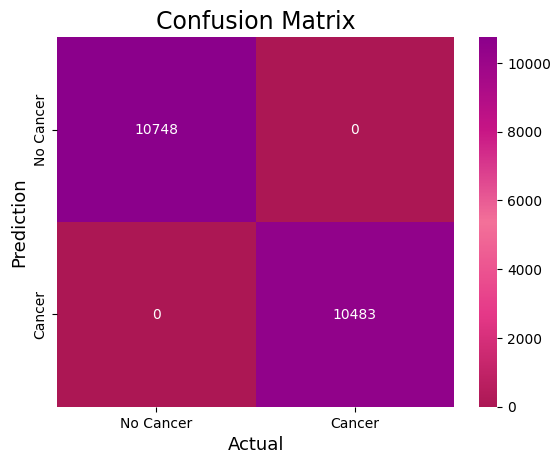

In [26]:
# Create confusion matrix
pink_colors = ['#AC1754', '#E53888', '#F37199', '#C71585', '#8B008B']
pink_cmap = LinearSegmentedColormap.from_list("pink_shades", pink_colors, N=256)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g', xticklabels=['No Cancer', 'Cancer'], yticklabels=['No Cancer', 'Cancer'], cmap=pink_cmap)
plt.ylabel('Prediction', fontsize=13)
plt.xlabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17)
plt.show()

In [27]:
# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


In [28]:
# Print performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
